# Lecture 14: Kernels

In this lector, we will introduce a very important concept in machine learning: Kernel. So far, the majority of the machine learning models we have seen have been *linear*, we will see kernel as a general way to make many of these models *non-linear*.


# 14.1: The Kernel Trick in SVMs

We start with SVMs as a motivating example. In the previous lecture, we mainly discuss the linear SVMs, and now we will introduce how to use kernel tricks to make it suitable for dealing with non-linear data. We will do some review first.

## 14.1.1 Review: Binary Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

* 1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
* 2. __Binary Classification__: The target variable $y$ is discrete and takes on one of $K=2$ possible values.

In this lecture, we assume $\mathcal{Y} = \{-1, +1\}$.

## 14.1.2 Review: SVM Model Family

We will consider models of the form

\begin{align*}
f_\theta(x) = \theta^\top \phi(x) + \theta_0
\end{align*}

where $x$ is the input and $y \in \{-1, 1\}$ is the target. 

## 14.1.3 Review: Primal and Dual Formulations

Recall that the the max-margin hyperplane can be formualted as the solution to the following *primal* optimization problem.
\begin{align*}
\min_{\theta,\theta_0, \xi}\; & \frac{1}{2}||\theta||^2 + C \sum_{i=1}^n \xi_i \;  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 - \xi_i \; \text{for all $i$} \\
& \xi_i \geq 0
\end{align*}

The solution to this problem also happens to be given by the following *dual* problem:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

## 14.1.4 Review: Primal Solution

We can obtain a primal solution from the dual via the following equation:
$$
\theta^* = \sum_{i=1}^n \lambda_i^* y^{(i)} x^{(i)}.
$$

Ignoring the $\theta_0$ term for now, the score at a new point $x'$ will equal
$$
(\theta^*)^\top x' = \sum_{i=1}^n \lambda_i^* y^{(i)}(x^{(i)})^\top x'.
$$

## 14.1.5 The Kernel Trick in SVMs

Now we start to introduce the kernel trick in SVMs. Notice that in both equations, the features $x$ are never used directly. Only their *dot product* is used.
\begin{align*}
J(\lambda) &= \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
(\theta^*)^\top x' & = \sum_{i=1}^n \lambda_i^* y^{(i)}(x^{(i)})^\top x'.
\end{align*}

If we can compute the dot product efficiently, we can potentially use very complex features.

## 14.1.6 Review: Polynomial Regression

We will introduce a bit more on polynomial regression and use it to let you know how and why the kernel trick works. Recall that a $p$-th degree polynomial

$$
a_p x^p + a_{p-1} x^{p-1} + ... + a_{1} x + a_0.
$$

forms a linear model with parameters $a_p, a_{p-1}, ..., a_0$.
This means we can use our algorithms for linear models to learn non-linear features!

Specifically, given a one-dimensional continuous variable $x$, we can define a feature function $\phi : \mathbb{R} \to \mathbb{R}^p$ as

$$\phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

Then the class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_p x^p = \theta^\top \phi(x) $$
with parameters $\theta$ encompasses the set of $p$-degree polynomials.

## 14.1.7 The Kernel Trick: A First Example

Based on the previous polynomial example, Can we compute the dot product $\phi(x)^\top \phi(x')$ of polynomial features $\phi(x)$ more efficiently than using the standard definition of a dot product? 

Let's look at an example.

To start, consider polynomial features $\phi : \mathbb{R}^d \to \mathbb{R}^{d^2}$ of the form
$$ \phi(x)_{ij} = x_i x_j \;\text{ for $i,j \in \{1,2,\ldots,d\}$}. $$

For $d=3$ this looks like
$$ \small \phi(x) = \begin{bmatrix}
x_1 x_1 \\
x_1 x_2 \\
x_1 x_3 \\
x_2 x_1 \\
x_2 x_1 \\
x_2 x_2 \\
x_3 x_3 \\
x_3 x_1 \\
x_3 x_2 \\
x_3 x_3 \\
\end{bmatrix}.
$$

The product of $x$ and $z$ in feature space equals:
$$ \phi(x)^\top \phi(z) = \sum_{i=1}^d \sum_{j=1}^d x_i x_j z_i z_j $$
Normally, computing this dot product involves a sum over $d^2$ terms and takes $O(d^2)$ time.

An altenative way of computing the dot product $\phi(x)^\top \phi(z)$ is to instead compute $(x^\top z)^2$. One can check that this has the same result:
\begin{align*}
(x^\top z)^2 & = (\sum_{i=1}^d x_i z_i)^2 \\
& = (\sum_{i=1}^d x_i z_i) \cdot (\sum_{j=1}^d x_j z_j) \\
& = \sum_{i=1}^d \sum_{j=1}^d x_i z_i x_j z_j \\
& = \phi(x)^\top \phi(z)
\end{align*}
What is the big-O runtime for computing this?

Actually computing $(x^\top z)^2$ can be done in only $O(d)$ time! 

This is a very powerful idea:
* We can compute the dot product between $O(d^2)$ features in only $O(d)$ time.
* We can use high-dimensional features within ML algorithms that only rely on dot products without incurring extra costs.

## 14.1.8 The Kernel Trick: Polynomial Features

We make a brief summary here on the kernel trick of polynomial features. The number of polynomial features $\phi_p$ of degree $p$ when $x \in \mathbb{R}^d$ 

$$ \phi_p(x)_{i_1, i_2, \ldots, i_p} = x_{i_1} x_{i_2} \cdots x_{i_p} \;\text{ for $i_1, i_2,  \ldots, i_p \in \{1,2,\ldots,d\}$} $$

scales as $O(d^p)$. 

However, we can compute the dot product $\phi_p(x)^\top \phi_p(z)$ in this feature space in only $O(d)$ time for any $p$ as:
$$\phi_p(x)^\top \phi_p(z) = (x^\top z)^p.$$

## 14.1.9 The Kernel Trick in SVMs

Now we start to introduce the kernel trick in SVMs. More generally, given features $\phi(x)$, suppose that we have a function $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ that outputs dot products between vectors in $\mathcal{X}$

$$ K(x, z) = \phi(x)^\top \phi(z). $$

We will call $K$ the *kernel function*.

Recall that an example of a useful kernel function is
$$K(x,z) = (x \cdot z)^p$$
because it computes the dot product of polynomial features of degree $p$.

Notice that we can rewrite the dual of the SVM as
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} K(x^{(i)}, x^{(k)})  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

Also, the predictions at a new point $x'$ are given by $$\sum_{i=1}^n \lambda_i^* y^{(i)} K(x^{(i)}, x').$$

Using our earlier trick, we can use polynomial features of any degree $p$ in SVMs without forming these features and at no extra cost!

## 14.1.10 The Kernel Trick: General Idea

Many types of features $\phi(x)$ have the property that their dot product $\phi(x)^\top \phi(z)$ can be computed more efficiently than if we had to form these features explicitly.

Also, we will see that many algorithms in machine learning can be written down as optimization problems in which the features $\phi(x)$ only appear as dot products $\phi(x)^\top \phi(z)$.

The *Kernel Trick* means that we can use complex non-linear features within  these algorithms with little additional computational cost.

Examples of algorithms in which we can use the Kernel trick:
* Supervised learning algorithms: linear regression, logistic regression, support vector machines, etc.
* Unsupervised learning algorithms: PCA, density estimation.

We will look at more examples shortly.

# 14.2: Kernelized Ridge Regression

Support vector machines are far from being the only algorithm that benefits from kernels.

Another algorithm that supports kernels is Ridge regression.

## 14.2.1 Review: Ridge Regression

Recall that a linear model has the form
$$ f_\theta(x) = \theta^\top \phi(x). $$
where $\phi(x)$ is a vector of features.

We pick $\theta$ to minimize the (L2-regularized) mean squared error (MSE):
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)} - \theta^\top \phi(x^{(i)}))^2 + \frac{\lambda}{2}\sum_{j=1}^d \theta_j^2$$

## 14.2.2 Review: Polynomial Regression

Given a one-dimensional continuous variable $x$, we can defining a feature function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_p x^p = \theta^\top \phi(x) $$
with parameters $\theta$ and polynomial features $\phi$ is the set of $p$-degree polynomials.

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used to obtain models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

## 14.2.3 The Featurized Design Matrix

It is useful to represent the featurized dataset as a matrix $\Phi \in \mathbb{R}^{n \times p}$:

$$ \Phi = \begin{bmatrix}
\phi(x^{(1)})_1 & \phi(x^{(1)})_2 & \ldots & \phi(x^{(1)})_p \\
\phi(x^{(2)})_1 & \phi(x^{(2)})_2 & \ldots & \phi(x^{(2)})_p \\
\vdots \\
\phi(x^{(n)})_1 & \phi(x^{(n)})_2 & \ldots & \phi(x^{(n)})_p
\end{bmatrix}
=
\begin{bmatrix}
- & \phi(x^{(1)})^\top & - \\
- & \phi(x^{(2)})^\top & - \\
& \vdots & \\
- & \phi(x^{(n)})^\top & - \\
\end{bmatrix}
.$$

## 14.2.4 Featurized Normal Equations

The normal equations provide a closed-form solution for $\theta$:
$$ \theta = (X^\top X  + \lambda I)^{-1} X^\top y.$$

When the vectors of attributes $x^{(i)}$ are featurized, we can write this as
$$ \theta = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top y.$$

## 14.2.5 Push-Through Matrix Identity

We can modify this expression by using a version of the [push-through matrix identity](https://en.wikipedia.org/wiki/Woodbury_matrix_identity#Discussion):

$$ (\lambda I + U V)^{-1} U = U (\lambda I + V U)^{-1} $$

where $U \in \mathbb{R}^{n \times m}$ and $V \in \mathbb{R}^{m \times n}$ and $\lambda \neq 0$

The proof sketch is: Start with $U (\lambda I + V U) = (\lambda I + U V) U$ and multiply both sides by $(\lambda I + V U)^{-1}$ on the right and $(\lambda I + U V)^{-1}$ on the left. If you are interested, you can try to derive in detail by yourself. 

## 14.2.6 Normal Equations: Dual Form

We can apply the identity $(\lambda I + U V)^{-1} U = U (\lambda I + V U)^{-1}$ to the normal equations with $U=\Phi^\top$ and $V=\Phi$.

$$ \theta = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top y$$

to obtain the *dual* form:

$$ \theta = \Phi^\top (\Phi \Phi^\top + \lambda I)^{-1} y.$$

The first approach takes $O(p^3)$ time; the second is $O(n^3)$ and is faster when $p > n$.

## 14.2.7 Feature Representations for Parameters

An interesting corollary of the dual form
$$ \theta = \Phi^\top \underbrace{(\Phi \Phi^\top + \lambda I)^{-1} y}_\text{call this vector $\alpha$} = \Phi^T \alpha$$
is that the optimal $\theta$ is a linear combination of the $n$ training set features:
$$ \theta = \sum_{i=1}^n \alpha_i \phi(x^{(i)}). $$

Here, the weights $\alpha_i$ are derived from $(\Phi \Phi^\top + \lambda I)^{-1} y$ and equal
$$\alpha_i = \sum_{j=1}^n L_{ij} y_j$$
where $L = (\Phi \Phi^\top + \lambda I)^{-1}.$

## 14.2.8 Predictions From Feature Products

Consider now a prediction $\phi(x')^\top \theta$ at a new input $x'$:
$$\phi(x')^\top \theta = \sum_{i=1}^n \alpha_i \phi(x')^\top \phi(x^{(i)}).$$

The crucial observation is that the features $\phi(x)$ are never used directly in this equation. Only their dot product is used!

## 14.2.9 Learning From Feature Products

We also don't need features $\phi$ for learning $\theta$, just their dot product! 
First, recall that each row $i$ of $\Phi$ is the $i$-th featurized input $\phi(x^{(i)})^\top$.

Thus $K = \Phi \Phi^\top$ is a matrix of all dot products between all the $\phi(x^{(i)})$
$$K_{ij} = \phi(x^{(i)})^\top \phi(x^{(j)}).$$

We can compute $\alpha = (K+\lambda I)^{-1}y$ and use it for predictions
$$\phi(x')^\top \theta = \sum_{i=1}^n \alpha_i \phi(x')^\top \phi(x^{(i)}).$$
and all this only requires dot products, not features $\phi$!

# 14.3: Types of Kernels

We have seen two examples of kernelized algorithms: SVM and ridge regression. Let's now look at some additional examples of kernels.

## 14.3.1 Review: Kernelized Ridge Regression

The normal equations provide a closed-form solution for $\theta$:

$$ \theta = (\Phi^\top \Phi + \lambda I)^{-1} \Phi^\top y.$$

They also can be written in this form:

$$ \theta = \Phi^\top (\Phi \Phi^\top + \lambda I)^{-1} y.$$

The first approach takes $O(d^3)$ time; the second is $O(n^3)$ and is faster when $d > n$.

An interesting corollary is that the optimal $\theta$ is a linear combination of the $n$ training set features:
$$ \theta = \sum_{i=1}^n \alpha_i \phi(x^{(i)}). $$
We can compute a prediction $\phi(x')^\top \theta$ for $x'$ without ever using the features (only their dot products):
$$\phi(x')^\top \theta = \sum_{i=1}^n \alpha_i \phi(x')^\top \phi(x^{(i)}).$$
Equally importantly, we can learn $\theta$ from only dot products.

## 14.3.2 Review: Kernelized SVMs

We can rewrite the dual of the SVM as
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} K(x^{(i)}, x^{(k)})  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

Also, the predictions at a new point $x'$ are given by $$\sum_{i=1}^n \lambda_i^* y^{(i)} K(x^{(i)}, x').$$

## 14.3.3 Definition: Kernels

The *kernel* corresponding to features $\phi(x)$ is a function $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ that outputs dot products between vectors in $\mathcal{X}$
$$ K(x, z) = \phi(x)^\top \phi(z). $$

We will also consider general functions $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ and call these *kernel functions*.

Kernels have multiple intepreations:
* The dot product or geometrical angle between $x$ and $z$
* A notion of similarity between $x$ and $z$

We will look at a few examples of kernels using the following dataset. The following code visualizes the dataset.

(-3.0, 3.0)

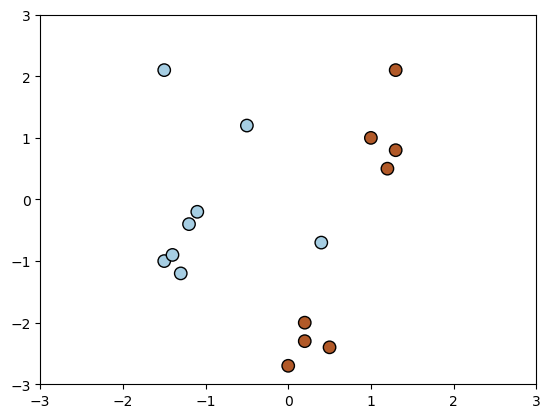

In [1]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Our dataset and targets
X = np.c_[(.4, -.7), (-1.5, -1), (-1.4, -.9), (-1.3, -1.2), (-1.1, -.2), (-1.2, -.4), (-.5, 1.2), (-1.5, 2.1), (1, 1),
          (1.3, .8), (1.2, .5), (.2, -2), (.5, -2.4), (.2, -2.3), (0, -2.7), (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

x_min, x_max = -3, 3
y_min, y_max = -3, 3
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k', s=80)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

The above figure is a visualization of the 2D dataset we have created. We will then use it to illustrate the difference between various kernels.

## 14.3.4 Example: Linear Kernel

The simplest kind of kernel that exists is called the linear kernel.
This simply corresponds to dot product multiplication of the features:
$$K(x,z) = x^\top z$$

Applied to an SVM, this corresponds to a linear decision boundary.

Below is an example of how we can use the SVM implementation in `sklearn` with a linear kernel.

Internally, this solves the dual SVM optimization problem.

(-3.0, 3.0)

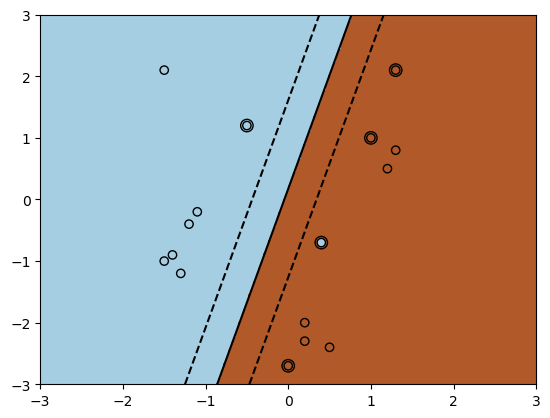

In [2]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='linear' , gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

The above figure shows that a linear kernel provides linear decision boundaries to separate the data.

## 14.3.5 Example: Polynomial Kernel

We then move to a more interesting example of the polynomial kernel of degree $p$, of which we have already seen a simple example:
$$K(x,z) = (x^\top z + c)^p.$$

This corresponds to a mapping to a feature space of dimension $d+p \choose p$ that has all monomials $x_{i_1}x_{i_2}\cdots x_{i_p}$ of degree at most $p$.

For $d=3$ this feature map looks like
$$ \small \phi(x) = \begin{bmatrix}
x_1 x_1 \\
x_1 x_2 \\
x_1 x_3 \\
x_2 x_1 \\
x_2 x_1 \\
x_2 x_2 \\
x_3 x_3 \\
x_3 x_1 \\
x_3 x_2 \\
x_3 x_3 \\
\sqrt{2}c x_1 \\
\sqrt{2}c x_2 \\
\sqrt{2}c x_3 \\
c
\end{bmatrix}.
$$

The polynomial kernel allows us to compute dot products in a $O(d^p)$-dimensional space in time $O(d)$.

The following code shows how it would be implemented in `sklearn`.

(-3.0, 3.0)

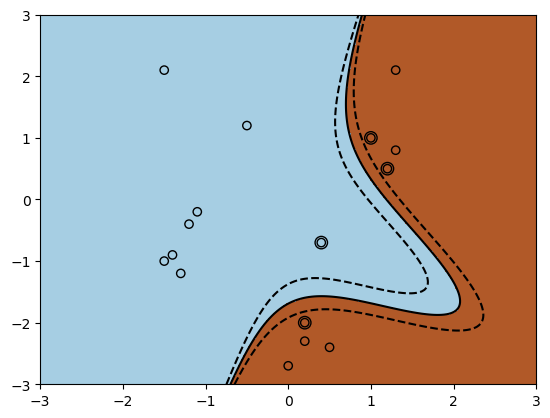

In [3]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='poly', degree=3, gamma=2)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

The above figure is a visualization of the polynomial kernel with degree of 3 and gamma of 2. The decision boundary is non-linear, in contrast to that of linear kernels.

## 14.3.6 Example: Radial Basis Function Kernel

Another example is the Radial Basis Function (RBF; sometimes called Gaussian) kernel
$$K(x,z) = \exp \left(-\frac{||x - z||^2}{2\sigma^2}\right),$$
where $\sigma$ is a hyper-parameter. It's easiest to understand this kernel by viewing it as a similarity measure.

We can show that this kernel corresponds to an *infinite-dimensional* feature map and the limit of the polynomial kernel as $p \to \infty$. 

To see why that's intuitively the case, consider the Taylor expansion

$$
\exp \left(-\frac{||x - z||^2}{2\sigma^2}\right) \approx 1 - \frac{||x - z||^2}{2\sigma^2} + \frac{||x - z||^4}{2! \cdot 4\sigma^4} - \frac{||x - z||^6}{3! \cdot 8\sigma^6} + \ldots
$$

Each term on the right hand side can be expanded into a polynomial.

We can look at the `sklearn` implementation again.

(-3.0, 3.0)

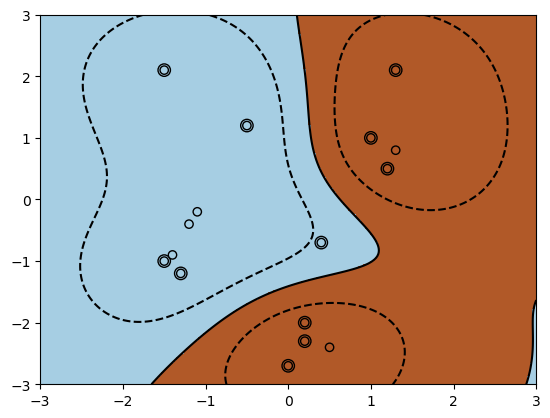

In [4]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html
clf = svm.SVC(kernel='rbf', gamma=.5)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

The above figure is very interesting yet intriguing since it shows how RBF kernel looks like in our generated 2D data. It would be worth to compare the decision boundaries of the three kernels we have introduced: linear kernel, polynomial kernal and RBF kernel. There are even more kernel options in `sklearn` and we encourage you to try more of them using the same data.

## 14.3.7 When is $K$ A Kernel?

We've seen that for many features $\phi$ we can define a kernel function $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ that efficiently computes $\phi(x)^\top \phi(x)$.

Suppose now that we use some kernel function $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ in an ML algorithm. Is there an implicit feature mapping $\phi$ that corresponds to using K?

Let's start by defining a necessary condition for $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ to be associated with a feature map.

Suppose that $K$ is a kernel for some feature map $\phi$, and consider an arbitrary set of $n$ points $\{x^{(1)}, x^{(2)}, \ldots, x^{(n)}\}$.

Consider the matrix $L \in \mathbb{R}^{n\times n}$ defined as $L_{ij} = K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^\top \phi(x^{(j)})$. We claim that $L$ must be symmetric and positive semidefinite.

Indeed, it $L$ is symmetric because the dot product $\phi(x^{(i)})^\top \phi(x^{(j)})$ is symmetric. Moreover, for any $z$,

\begin{align*}
z^\top L z
& = \sum_{i=1}^n \sum_{j=1}^n z_i L_{ij} z_j 
 = \sum_{i=1}^n \sum_{j=1}^n z_i \phi(x^{(i)})^\top \phi(x^{(j)}) z_j \\
& = \sum_{i=1}^n \sum_{j=1}^n z_i (\sum_{k=1}^n \phi(x^{(i)})_k \phi(x^{(j)})_k ) z_j \\
& = \sum_{k=1}^n \sum_{i=1}^n \sum_{j=1}^n z_i \phi(x^{(i)})_k \phi(x^{(j)})_k z_j \\
& = \sum_{k=1}^n \sum_{i=1}^n \left( z_i \phi(x^{(i)})_k \right)^2 \geq 0
\end{align*}

Thus if $K$ is a kernel, $L$ must be positive semidefinite for any $n$ points $x^{(i)}$.

## 14.3.8 Mercer's Theorem

Now we will introduce the Mercer's Theorem which is of critical importance in determining whether function $K$ is a kernel. 

The general idea of the theorem is that: if $K$ is a kernel, $L$ must be positive semidefinite for any set of $n$ points $x^{(i)}$. 

It turns out that it is is also a sufficent condition.

__Theorem.__ (Mercer) Let $K: \mathcal{X} \times \mathcal{X} \to [0,\infty]$ be a kernel function. There exists a mapping $\phi$ associated with $K$ if for any $n$ and any dataset $\{x^{(1)}, x^{(2)}, \ldots, x^{(n)}\}$ of size $n \geq 1$, if and only if the matrix $L$ defined as $L_{ij} = K(x^{(i)}, x^{(j)})$ is symmetric and positive semidefinite.

This characterizes precisely which kernel functions correspond to some $\phi$.

## 14.3.9 Pros and Cons of Kernels

We have introduce many good properties of Kernels. However, are kernels a free lunch? The answer is not quite.
* Kernels allow us to use features $\phi$ of very large dimension $d$.
* However computation is at least $O(n^2)$, where $n$ is the dataset size. We need to compute distances $K(x^{(i)}, x^{(j)})$, for all $i,j$.
* Approximate solutions can be found more quickly, but in practice kernel methods are not used with today's massive datasets.
* However, on small and medium-sized data, kernel methods will be at least as good as neural nets and probably much easier to train.

# 14.4 Summary: Kernels

We make a summary for Kernels to finish the discussions of this lecture.

Definition:
* A kernel is a function $K: \mathcal{X} \times \mathcal{X} \to [0,\infty]$ that defines a notion of similarity over pairs of vectors in $\mathcal{X}$.

Usage:
* Kernels are often associated with high-dimensional features $\phi$ and implicitly map inputs to this feature space.

Generalization:
* Kernels can be incorporated into many machine learning algorithms, which enables them to learn highly nonlinear models.

Examples of algorithms in which we can use kernels include:
* Supervised learning algorithms: linear regression, logistic regression, support vector machines, etc.
* Unsupervised learning algorithms: PCA, density estimation.

Kernels are very powerful because they can be used throughout machine learning. 